In [2]:
import sys
sys.path.append('../')

import numpy as np
import pygme

%load_ext autoreload
%autoreload 2

from pygme import GuidedModeExp, Circle, PhotCryst, Lattice
import matplotlib.pyplot as plt
from itertools import zip_longest

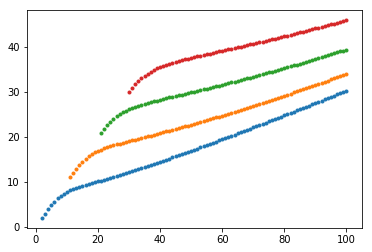

In [18]:
# Test guided mode solver
gs=np.linspace(1,100,100)
epses=np.array([1,12,1])
ds=np.array([0.1])
(omegas, coeffs) = pygme.guided_modes(gs, epses, ds, step=1e-1/np.sqrt(epses.max()), n_modes=4, mode='TM')
omegasT = [list(filter(None, i)) for i in zip_longest(*omegas)]

for w in omegasT:
    plt.plot(gs[-len(w):],w,'.')
plt.show()

## Square lattice 

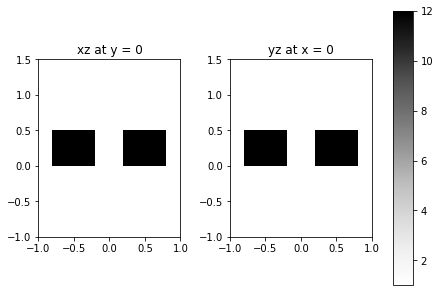

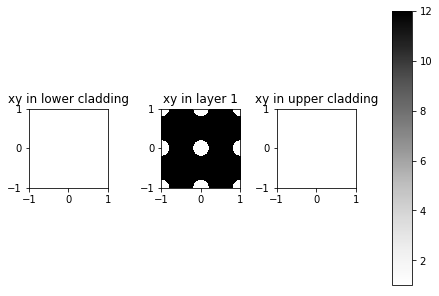

In [3]:
# Initialize a lattice
lattice = Lattice('square')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=0.5, eps_b=12.)
# Add a shape to this layer 
phc.add_shape(Circle(r=0.2))
# phc.claddings[0].add_shape(Circle(r=0.1, eps=5))
# Plot an overview picture
phc.plot_overview(cladding='True')

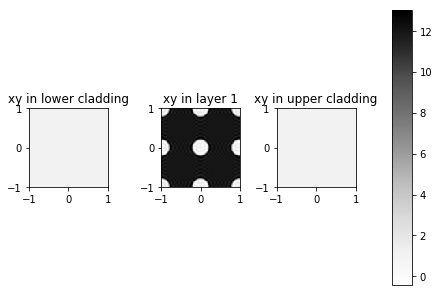

In [4]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft(cladding=True)

In [15]:
gme.run(gmode_inds=[0], N_g_array = 100)

0.2546 seconds for guided mode computation
0.0070 seconds for inverse matrix of Fourier-space permittivity
Running k-point 1 of 1
0.2777 seconds total time to run


In [16]:
print(gme.gvec.shape)
print(gme.freqs)

(2, 121)
[[1.27714216e-08 1.95904722e-03 4.46942536e-03 1.74600982e-02
  1.96915485e-02 2.20133153e-02 2.83018609e-02 2.87778667e-02
  3.53008020e-02 4.41279250e-02 4.91992669e-02 6.38225931e-02
  7.08899752e-02 1.14185832e-01 1.49396195e-01 1.58093584e-01
  1.76351042e-01 1.91965933e-01 1.91994169e-01 2.08503628e-01
  2.34189923e-01 2.42962939e-01 2.57403851e-01 2.57408479e-01
  2.70773040e-01 3.05743926e-01 3.07175663e-01 3.35226698e-01
  3.35244632e-01 3.36478523e-01 3.36478584e-01 3.71349489e-01
  4.25077619e-01 4.25256644e-01 4.66465000e-01 4.66475602e-01
  5.42716608e-01 5.46927393e-01 5.58070115e-01 5.68698337e-01
  6.04732251e-01 6.04735901e-01 6.27476792e-01 6.36469492e-01
  6.84518186e-01 6.84633617e-01 7.31284413e-01 7.40298704e-01
  7.80470624e-01 8.00101360e-01 8.24278322e-01 8.25568699e-01
  8.49235602e-01 8.50313980e-01 9.62670632e-01 1.00298027e+00
  1.01078803e+00 1.01127996e+00 1.01873314e+00 1.03627052e+00
  1.11339747e+00 1.16299620e+00 1.20637698e+00 1.20671191e+00

In [67]:
print(gme.construct_mat(k = [0, 0]).dtype)
# print(np.where(1==gme.gmode_te))

complex128


In [48]:
print(gme.coeffs_te[0][0].shape)
A1list = [gme.coeffs_te[0][i][1, 0] for i in range(5)]
np.array(A1list).shape

(3, 2, 1)


(5, 1)

## Two-layer hexagonal lattice

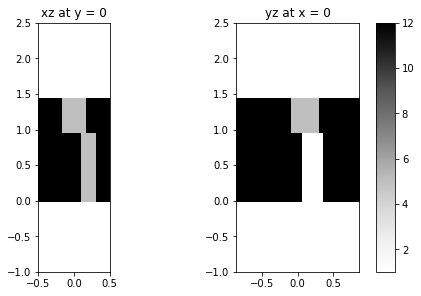

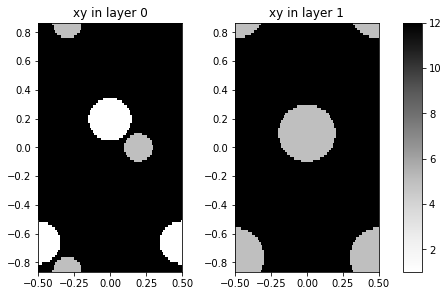

In [90]:
# Initialize a lattice
lattice = Lattice('hexagonal')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add shapes to this layer 
phc.add_shape(Circle(y_cent = 0.2, r = 0.15), layer=0)
phc.add_shape(Circle(x_cent = 0.2, r = 0.1, eps = 5), layer=0)
# Add another layer and a shape
phc.add_layer(d=0.5, eps_b=12)
phc.layers[-1].add_shape(Circle(y_cent = 0.1, r = 0.2, eps=5))
# Plot an overview picture
phc.plot_overview()

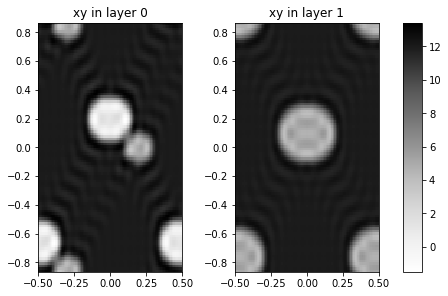

In [91]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

In [95]:
gme.run(N_g_array = 5)

[ 1.         10.8482374  10.98427236  1.        ] [1.  0.5]
[[], [], [], [], []] [[], [], [], [], []]


In [71]:
n = [1, 3]
n = np.array(n)
n1 = n[np.remainder(n, 2) == 0]
print(n1.shape)
if n1:
    print('hey')

(0,)


/home/momchil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [21]:
t = np.array([1, 2, 3])
o = np.ones((3))
print(np.outer(t, o))
print(t[:, np.newaxis] - o)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [28]:
t1, t2 = (0, 0)